# Topological ordering using DFS
<br/><span style="font-size: 1.3rem">What is a topological order of a DAG (Directed Acyclic Graph)?</span>
<br/><span style="font-size: 1.3rem">It is a linear ordering of vertices such that if there is an edge between $u$ and $v$, then $u$ always appears before $v$ in that ordering.</span>

***
## Wrapper Class for Graph Visualization

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i+1, j+1, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10**5
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Initializing the graph

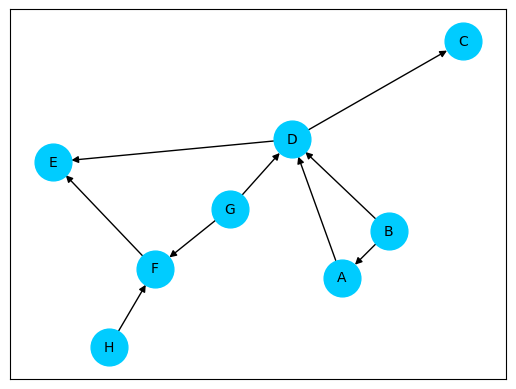

In [5]:
edgeList = [
    ('B', 'A', 1),
    ('B', 'D', 1),
    ('A', 'D', 1),
    ('D', 'C', 1),
    ('D', 'E', 1),
    ('G', 'D', 1),
    ('G', 'F', 1),
    ('H', 'F', 1),
    ('F', 'E', 1)
]
G1 = GraphVisualization(weighted = False, edge_list = edgeList, isDirected = True)
G1.visualize()

***
## Function to convert from edge-list to adjancency-matrix

In [6]:
def edge_list_to_adjacency_matrix(edge_list, directed=False):
    # get number of vertices
    s = set()
    for i in edge_list:
        s.add(i[0]); s.add(i[1])
    num_vertices = len(s)
    s = list(s)
    # Initialize an n x n matrix with all 0's
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Iterate through each edge in the edge list
    for edge in edge_list:
        u, v = edge[:2]  # Get the vertices of the edge
        adj_matrix[ord(u) - 65][ord(v) - 65] = edge[2]  # Mark edge u -> v with 1 (or edge weight if any)
        
        if not directed:
            adj_matrix[ord(v) - 65][ord(u) - 65] = edge[2]  # For undirected graphs, also mark edge v -> u
        else: adj_matrix[ord(v) - 65][ord(u) - 65] = -edge[2]
    
    return adj_matrix

In [7]:
adjacency_matrix = edge_list_to_adjacency_matrix(edgeList, directed = True)
adjacency_matrix

[[0, -1, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, -1, 0, 0, 0, 0],
 [-1, -1, 1, 0, 1, 0, -1, 0],
 [0, 0, 0, -1, 0, -1, 0, 0],
 [0, 0, 0, 0, 1, 0, -1, -1],
 [0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0]]

***
# Algorithm
1. We must traverse all components of the graph.
2. Make sure to carry a visited array(all elements are initialized to 0) and a stack data structure, where we are going to store the nodes after completing the DFS call.
3. In the DFS call, first, the current node is marked as visited. Then DFS call is made for all its adjacent nodes.
4. After visiting all its adjacent nodes, DFS will backtrack to the previous node and meanwhile, the current node is pushed into the stack.
5. Remove the visited vertices from the list of total unvisited vertices.
6. Repeat step 3 to 5 until the list of total unvisited vertices is empty.
7. Finally, we will get the stack containing one of the topological sortings of the graph.
## Solution class

In [8]:
class Solution:
    def __init__(self, adjacency_matrix):
        self.stack = [] # visited nodes
        self.a_matrix = adjacency_matrix
        self.vertexList = [i for i in range(len(self.a_matrix))] #not visited nodes

    def DFS(self, index = 0):
        if index in self.stack or index >= len(self.a_matrix): return
        for i in range(len(self.a_matrix[index])):
            if self.a_matrix[index][i] > 0 and i not in self.stack: self.DFS(i)
        if index not in self.stack: self.stack.append(index)

    def __call__(self):
        while len(self.vertexList) > 0:
            self.DFS(self.vertexList[0])
            self.vertexList = [i for i in self.vertexList if i not in self.stack]
        self.stack.reverse()

## Driver code

In [9]:
driver = Solution(adjacency_matrix); driver()

for i in driver.stack:
    print(chr(i + 65), end = " ")

H G F B A D E C 

**Note:**
- Topological order is only valid for DAG (Directed Acyclic Graph).
- Topological order of a DAG is not unique, i.e, a DAG can have more than 1 topological order.
***